In [43]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea # Used to make prettier graphs

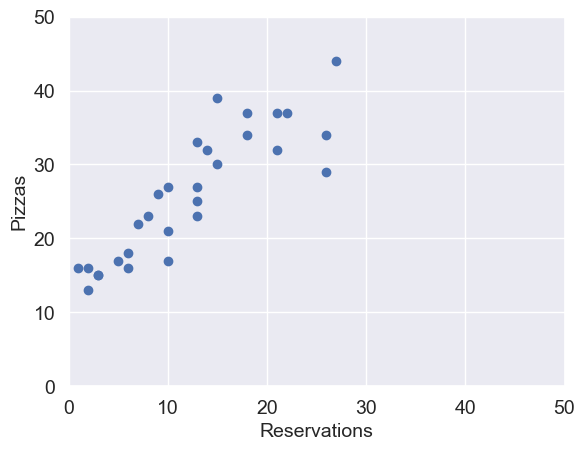

In [44]:
# Setup graph
sea.set()
plt.axis([0, 50, 0 , 50])
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xlabel("Reservations", fontsize=14)
plt.ylabel("Pizzas", fontsize=14)

# Load data
X, Y = np.loadtxt("./pizza_data.txt", skiprows=1, unpack=True)

# Plotting the data
plt.plot(X, Y, "bo")


In [45]:
# Usually, we'd be using the notation y=xw, where w is called the weight, which affects the slope of the line
# The forecast / prediction of an input is written like so: y-hat = x * w
# AKA y is the truth, y-hat is the prediction
def predict(X, w):
  return X * w

# Predicting pizzas given 20 reservations, and a weight of 2.1
predict(20, 2.1)

42.0

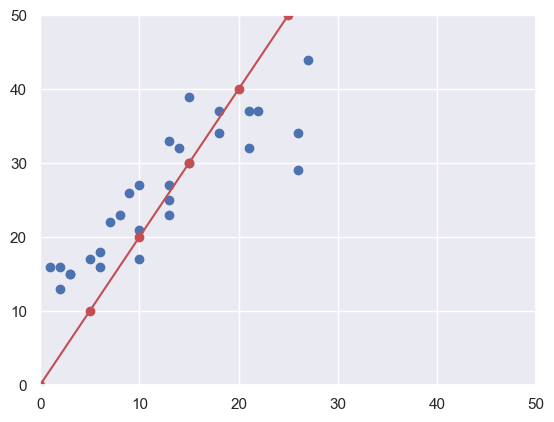

In [79]:
# Plotting an approximate line manually
def linear(m, b):
  x_arr = []
  y_arr = []
  for i in range(0,50, 5):
    x_arr.append(i)
    y_arr.append(i*m + b)
  return x_arr, y_arr
x_manual, y_manual = linear(2,0)
# print(x_manual, y_manual)
plt.axis([0, 50, 0 , 50])
plt.plot(X, Y, "bo")
plt.plot(x_manual, y_manual, "o-r")

In [47]:
# Let's try to predict a weight given all the initial x and y values
# I think it would be to take the sum of all x, sum of all y, and divide by the number of items to get an average
avgX = np.sum(X) / len(X)
avgY = np.sum(Y) / len(Y)
weight = avgY / avgX
print("Predicted weight: ", weight)

Predicted weight:  2.1210526315789475


In [48]:
'''
The above forumula doesn't capture everything we need though, as it would only account for linear models. We want to consider the error, or how incorrect the prediction is. It's called a loss function.
'''
# Let's predict pizzas for 14 reservations with a weight of 1.5
tempPrediction = predict(14, 1.5)
print("Predicted pizzas for 14 reservations:", tempPrediction)

# We have a value for 14 reservations in our dataset:
tempIndex = list(X).index(14)
print("Index of 14 reservations:", tempIndex)
tempActual = Y[tempIndex]
print("Actual data of 14 reservations:", tempActual)

Predicted pizzas for 14 reservations: 21.0
Index of 14 reservations: 2
Actual data of 14 reservations: 32.0


In [50]:
'''
We can see the the model was incorrectly predicting the amount of pizzas being sold.
The error can be calculated by the following: y-hat - y
AKA Prediction - Actual
'''
error = tempPrediction - tempActual
print("Error:", error)

# The errors should always be positive, so
fixedError = error ** 2
print("Corrected error:", fixedError)

# 

Error: -11.0
Corrected error: 121.0


In [51]:
'''
Let's define a better function to accomidate for loss. Here, we use NumPy
'''
def loss(X, Y, w):
  return (np.average((predict(X, w) - Y) ** 2))

print(loss(X, Y, 1.5))

94.96666666666667


Calculated weight: 1.844
Predicted pizzas for 20 reservations: ~37 pizzas


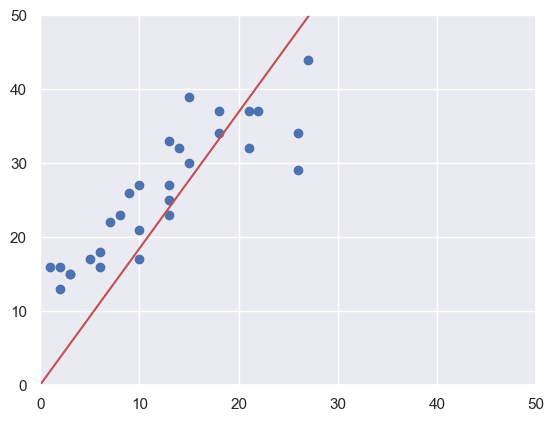

In [81]:
'''
Now that we have a function for loss, we can start training an algorithm. This is done by calculating the loss for predictions and attempting to minimize the loss to build a function.

Iterations are the amount of times you want to run the training function. If the learning rate is low, it will take a much longer time to find an appropriate function, and it could "error out" if it doesn't find a function within the available iterations. If lr is too high, it could be too inaccurate at finding a good fitting function. 

What the training function does is lowers the loss after each iteration. If it finds a new weight with a smaller loss, it will update the weight. If no better weight is found, it will return the calculated weight
'''
def train(X, Y, iterations, lr, verbose = False):
  # lr is called the "Learning Rate", how much the weight will change over each iteration

  # Start with no weight
  w = 0

  # Iterations is how many times we want to run the training algorithm
  for i in range(iterations):
    currentLoss = loss(X,Y,w)
    if verbose:
      print("Iteration %4d => Loss: %.6f" % (i, currentLoss))

    if loss(X, Y, w + lr) < currentLoss:
      w += lr
    elif loss(X, Y, w - lr) < currentLoss:
      w -= lr
    else:
      return w
    
  raise Exception("Couldn't converge within %d iterations" % iterations)

# Let's try it out
trainedWeight = train(X, Y, 1000000, .001)
print("Calculated weight: %.3f" % trainedWeight)

reservations = 20
print("Predicted pizzas for %d reservations: ~%.0f pizzas" % (reservations, predict(reservations, trainedWeight)))

plt.axis([0, 50, 0 , 50])
plt.plot(X, Y, "bo")
x_manual, y_manual = linear(trainedWeight, 0)
plt.plot(x_manual, y_manual, "r")

Calculated weight: 1.082
Predicted pizzas for 20 reservations: ~35 pizzas


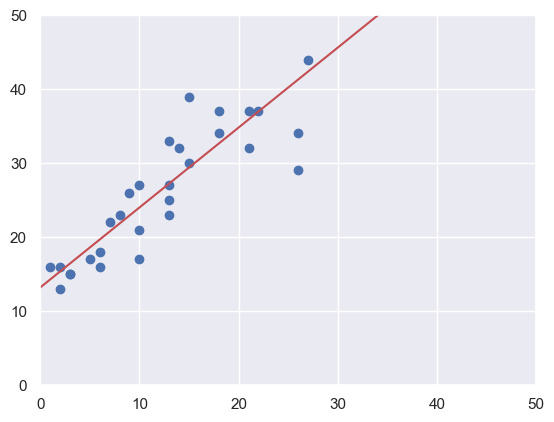

In [85]:
'''
Let's start talking about bias.

We're basically adding a y intercept to our function. The formula looks like:
y-hat = x * w + b

Where b is called "bias"
We'll update the old functions as new ones
'''

def predict_bias(X, w, b):
  return X * w + b

def loss_bias(X, Y, w, b):
  return np.average((predict_bias(X, w, b) - Y) ** 2)

def train_bias(X, Y, iterations, lr, verbose = False):
  w = b = 0
  for i in range(iterations):
    currentLoss = loss_bias(X, Y, w, b)
    if(verbose):
      print("Iteration %4d => Loss: %.6f" % (i, currentLoss))

    # Now we're trying out bias to see if we can decrease error even further
    if loss_bias(X, Y, w + lr, b) < currentLoss:
      w += lr
    elif loss_bias(X, Y, w - lr, b) < currentLoss:
      w -= lr
    elif loss_bias(X, Y, w, b + lr) < currentLoss:
      b += lr
    elif loss_bias(X, Y, w, b - lr) < currentLoss:
      b -= lr
    else: 
      return w, b
    
  raise Exception("Couldn't converge within %d iterations" % iterations)


# Let's try it out
trainedWeight, trainedBias = train_bias(X, Y, 1000000, .001)
print("Calculated weight: %.3f" % trainedWeight)

reservations = 20
print("Predicted pizzas for %d reservations: ~%.0f pizzas" % (reservations, predict_bias(reservations, trainedWeight, trainedBias)))

plt.axis([0, 50, 0 , 50])
plt.plot(X, Y, "bo")
# Now we can add our bias, AKA y-intercept
x_manual, y_manual = linear(trainedWeight, trainedBias)
plt.plot(x_manual, y_manual, "r")

Linear regression is great and all, but it's very limited in the types of problems it can solve. If we want to account for more parameters, maybe types of toppings predicted for those pizzas, we'll need more advanced algorithms. Tweaking the current train function will kill our performance. 

We'll continue with a new notebook for Gradient Decent.